In [ ]:
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t

In [1]:
import numpy as np

timesteps = 100 # 입력 시퀀스에 있는 타임스텝의 수
input_features = 32 # 입력 특성의 차원 
output_features = 64 # 출력 특성의 차원

inputs = np.random.random((timesteps, input_features)) # 입력 데이터

state_t = np.zeros((output_features,)) # 초기 상태

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: # input_t는 크기가 (input_features,)인 벡터 변환
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) # 입력과 현재 상태를 연결하여 현재 출력을 얻는다.
    
    successive_outputs.append(output_t) # 이 출력을 리스트에 저장한다.
    
    state_t = output_t # 다임 타임스텝을 위해 네트워크의 상태를 업데이트한다.
    
final_output_sequence = np.stack(successive_outputs, axis=0) # 최종 출력은 크기가 (timesteps, output_features)인 2D 텐서이다.

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)
batch_size = 32

print('데이터 로딩 ...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features
)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기', input_train.shape)
print('input_test 크기:', input_test.shape)

# 결과

# 데이터 로딩 ...
# 25000 훈련 시퀀스
# 25000 테스트 시퀀스
# 시퀀스 패딩 (samples x time)
# input_train 크기 (25000, 500)
# input_test 크기: (25000, 500)

데이터 로딩 ...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기 (25000, 500)
input_test 크기: (25000, 500)


In [4]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']
)
history = model.fit(
    input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
123/157 [======================>.......] - ETA: 42s - loss: 0.6781 - accuracy: 0.5585

KeyboardInterrupt: 

In [5]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 40ms/step - loss: 0.6333 - accuracy: 0.6581 - val_loss: 0.3819 - val_accuracy: 0.8572
Epoch 2/10
157/157 [==============================] - 5s 33ms/step - loss: 0.3377 - accuracy: 0.8710 - val_loss: 0.3839 - val_accuracy: 0.8334
Epoch 3/10
157/157 [==============================] - 5s 32ms/step - loss: 0.2476 - accuracy: 0.9077 - val_loss: 0.4103 - val_accuracy: 0.8402
Epoch 4/10
157/157 [==============================] - 5s 33ms/step - loss: 0.2021 - accuracy: 0.9251 - val_loss: 0.2955 - val_accuracy: 0.8924
Epoch 5/10
157/157 [==============================] - 5s 34ms/step - loss: 0.1735 - accuracy: 0.9378 - val_loss: 0.3256 - val_accuracy: 0.8812
Epoch 6/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1550 - accuracy: 0.9429 - val_loss: 0.3349 - val_accuracy: 0.8818
Epoch 7/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1411 - accuracy: 0.9531 - val_loss: 0.3232 - val_accuracy: 0.858

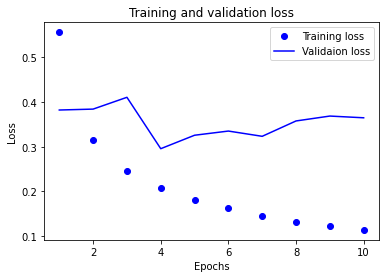

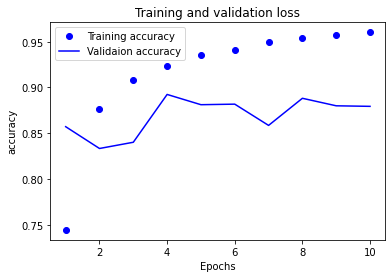

In [6]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validaion accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()


ax1 = fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()